# Data Mining Versuch Music Clustering
* Autor: Prof. Dr. Johannes Maucher
* Datum: 16.10.2015

[Übersicht Ipython Notebooks im Data Mining Praktikum](Data Mining Praktikum.ipynb)

# Einführung
## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Zugriff auf Musikdateien
* Transcodierung von mp3 zu wav 
* Extraktion von Merkmalen in Musikdateien (Feature Extraction)
* Optimierung mit dem genetischen Algorithmus
* Selektion der aussagekräftigsten Merkmale (Feature Selection)
* Clustering von Musikfiles (automatische Playlistgenerierung)


## Vor dem Versuch zu klärende Fragen

### Transcodierung von MP3 nach WAV und Merkmalsextraktion
In diesem Versuch wird der MP3 Decoder [mpg123](http://www.mpg123.de/) eingesetzt. Installieren und testen sie diesen Decoder vor dem Versuch auf ihrem Rechner. Machen Sie sich zunächst mit dem in Kapitel [Gegebene Module zur Transcodierung und Feature Extraction](#Gegebene-Module-zur-Transcodierung-und-Feature-Extraction) aufgeführten Code vertraut. Versuchen Sie Funktion und Ablauf dieses Programms zu verstehen und beantworten Sie folgende Fragen.

1. Was versteht man unter den statistischen Größen _Mittelwert, Standardabweichung, Skewness und Kurtosis_?
2. Was beschreibt die Fourier-Transformierte eines zeitlich ausgedehnten Signals?
3. Mit welcher Samplingrate werden die WAV Dateien abgetastet?
4. Insgesamt werden 42 Merkmale pro Musiksequenz extrahiert. Beschreiben Sie kurz diese Merkmale



#### Aufgabe 1
*verwendete Quelle zum Einlesen in Skewness: https://matheguru.com/stochastik/schiefe-linksschief-rechtsschief-symmetrisch.html<br>
 verwendete Quelle zum Einlesen in Kurtosis: http://www.statistics4u.info/fundstat_germ/cc_kurtosis.html*
- Der **Mittelwert** beschreibt den Durchschnittswert einer numerischen Datenmenge. Er ergibt sich aus der Summe aller Elemente der Menge, geteilt durch die Anzahl Elemente in der Menge.
> $a = \{1, 3, 5, 6, 7, 8, 6\}$<br>
$sum(a) = 36$<br>
$len(a) = 7$<br>
$Mittelwert(a) = \frac{sum(a)}{len(a)} = \frac{36}{7}\approx5.14$

- Die **Standardabweichung** ist ein Maß dafür, wie weit die Elemente einer Zahlenmenge verteilt sind. Sie gibt an, wie stark die einzelnen Elemente im Durchschnitt vom Mittelwert der Menge abweichen.
> Berechnung der Standardabweichung:<br><br>
$variance(a) = \frac{(1-5.14)^2+(3-5.14)^2+(5-5.14)^2+(6-5.14)^2+(7-5.14)^2+(8-5.14)^2+(6-5.14)^2}{7}=\frac{34.8572}{7}=4.9796$<br>
$sd(a) = \sqrt{variance(a)}=\sqrt{4.9796}\approx2.23$

- **Skewness** (auf deutsch: Schiefe) gibt an, ob und inwieweit sich eine Verteilungsfunktion zu einer seite 'neigt'. Alle symmetrischen Funktionen haben eine Skewness von 0. Jede nicht-symmetrische Funktion ist hat eine positive (linksschief - Funktion neigt sich nach rechts) oder negative (rechtsschief - Funktion neigt sich nach links) Skewness. Ist eine Funktion linksschief, ist der Median größer als der Mittelwert, ist sie rechtsschief, ist er kleiner.

- Die **Kurtosis** (auf deutsch: Wölbung) gibt an, wie steil/flach eine Verteilungsfunktion im Vergleich zur Normalverteilung zuläuft. Die Normalverteilung hat eine Kurtosis von 0. Ist eine Verteilungsfunktion am Maximum spitzer als die Normalverteilung, ist die Kurtosis > 0. Ist eine Verteilungsfunktion flacher als die Normalverteilung, ist die Kurtosis < 0.

#### Aufgabe 2
*verwendete Quellen zum Einarbeiten: https://www.youtube.com/playlist?list=PLLTAHuUj-zHgvbOordkJ5jLmqcls2ZNrg*

Die Fourier-Transformierte eines zeitlich ausgedehnten (kontinuierlichen) Signals ist die Funktion, die beschreibt, wie das Signal in ein kontinuierliches Frequenzspektrum zerlegt werden kann.

#### Aufgabe 3
mpg123 tastet die MP3-Datei mit einer Rate von 10kHz ab und schreibt die Daten in eine WAV-Datei (*mpg123_command* in *compute_chunk_features*). Diese WAV-Datei wird anschließend in Abschnitten von 60 Sekunden gelesen, mit 600 000 Frames pro 60 Sekunden. Das bedeutet, die WAV-Datei wird ebenfalls mit 10kHz abgetastet.

#### Aufgabe 4
Es werden die statistischen Größen Mittelwert, Standardabweichung, Skewness und Kurtosis jeweils für verschiedene Amplituden-Werte extrahiert. Per Fast Fourier Transformation (FFT) wird ausserdem für 10 verschiedene Power-Werte ermittelt, in welchen Frequenzen eine bestimmte Signalstärke (signal's power) vorkommt.

### Matching der Teilsequenzen

1. Nachdem für jedes Musikstück die beiden Teilsequenzen in Form der extrahierten Merkmale vorliegen: Wie kann die Ähnlichkeit zwischen Teilsequenzen ermittelt werden?
2. Welche Numpy- bzw. Scipy-Module können Sie für die Bestimmung der Ähnlichkeit zwischen Teilsequenzen einsetzen?

#### Aufgabe 1   
Man vergleicht die aus den extrahierten Merkmalen generierten Merkmalsvektoren. Sind Musikstücke ähnlich, liegen die Merkmalsvektoren nah beieinander. Beispielsweise über die euklidische Distanz.

#### Aufgabe 2  
Für die Berechnung der Distanz, bzw. Ähnlichkeit zwischen Teilsequenzen, kann das Modul ***scipy.spatial*** verwendet werden. Dabei wird für die Berechnung der euklidischen Distanz zweier Teilsequenzen die Vektoren der beiden Sequenzen als Numpy-Array an die Funktion *scipy.spatia.euclidean(a, b)* übergeben.

### Genetischer Algorithmus für die Merkmalsselektion

1. Beschreiben Sie die Prozesschritte im genetischen Algorithmus [Genetischer Algorithmus](https://www.hdm-stuttgart.de/~maucher/Python/FunktionenAlgorithmen/html/genAlgTSP.html)
2. In diesem Versuch wird davon ausgegangen, dass Merkmale dann gut sind, wenn durch sie die erste Teilsequenz eines Musikstücks durch einen ähnlichen Vektor wie die jeweils zweite Teilsequenz beschrieben wird. Wie kann mit dieser Annahme der genetische Algorithmus für die Merkmalsselektion angewandt werden. Unter Merkmalsselektion versteht man allgemein die Suche nach den $r$ besten Merkmalen aus einer Menge von insgesamt $R$ Merkmalen. In diesem Versuch werden initial $R=42$ Merkmale extrahiert, aus denen dann die besten $r<R$ Merkmale zu bestimmen sind. Überlegen Sie hierfür speziell wie die Fitnessfunktion, die Kreuzung und die Mutation zu realisieren sind.


#### Aufgabe 1
Ein genetischer Algorithmus durchläuft folgende Prozessschritte:
> 1. Erzeugung einer zufälligen Population
2. Berechnung der Fitnesswerte aller Individuen/Chromosomen der Popultion
3. Selektion zweier Elternindividuen (Selektion von Individuen mit hohem Fitnesswert ist wahrscheinlicher als Seklektion von Individuen mit geringem Fitnesswert)
4. Merkmale der Elternindividuen werden an zufälliger Grenze getrennt und mit Merkmalen des jeweils anderen Elternindividuums zusammengefügt
5. Zu einer festgelegten Wahrscheinlichkeit kann es anschließend zu Mutationen kommen. Dabei werden zufälige Merkmale des Individuums zufällig verändert. 
6. Der Fitnesswert der entstandenen Kinderindividuen wird berechnet und mit den schlechtesten Fitnesswerten der bisherigen Population verglichen. Sind die Fitnesswerte der Kinderindividuen besser als die der Individuen mit den schlechtesten Fitnesswerten, werden sie der Population hinzugefügt und die Individuen, mit den schlechtesten Fitnesswerten, der Population entfernt.
7. Anschließend wiederholt sich der Ablauf ab Schritt 2, bis eine festgelegte Anzahl Iterationen erreicht wurde. Jede Iteration entspricht einer Generation des genetischen Algorithmus.

#### Aufgabe 2
**Fitnessfunktion:** Die Fitness lässt sich über den Rang jeder zweiten Teilsequenz eines Musikstücks zu ihrer ersten Teilsequenz berechnen. Dazu werden für die Merkmale eines Individuums die Merkmalsvektoren aller Musikstücke gebildet und die Distanzen jedes ersten Teilstüks zu jedem zweiten Teilstück berechnet. Anschließend lässt sich aus einer nach Distanzen aufsteigend geordneten Liste bestimmen, an welchem Rang das zweite Teilstück des jeweiligen Musikstücks liegt. Diese Ränge werden aufsummiert und durch die Anzahl Musikstücke geteilt. Umso niedriger der mittlere Rang des Individuums ist, desto besser ist die Fitness des Individuums.

**Kreuzung**: Für die Kreuzung werden zwei Individuen ausgewählt. Dabei ist die Auswahl von Individuen mit guter Fitness wahrscheinlicher als die Auswahl von Individuen mit schlechter Fitness. Anschließend wird eine zufällige Grenze festgelegt, an der die ausgewählten Individuen geteilt werden. Dann werden die Teilstück so zusammengefügt, dass Kopf-A und Ende-B, sowie Kopf-B und Ende-A die Kinder bilden. Es muss allerdings noch geprüft werden, ob beide Kinder noch die festgelegte Anzahl Merkmale enthalten und keine doppelten Merkmale verloren gehen. Sollten doppelte Merkmale vorliegen, wird die komplette Kreuzung erneut durchgeführt. 

**Mutation**: Zu Mutationen für ein Kinderindividuum kommt es zu einer geringen Wahrscheinlichkeit. Tritt eine Mutation ein, wird ein zufälliges Merkmal durch ein anderes, noch nicht vorhandenes Merkmal, ersetzt.

### Clustering und Playlistgenerierung

1. Wie kann mit einem hierarchischen Clustering der Musikfiles eine Menge von Playlists erzeugt werden, so dass innerhalb einer Playlist möglichst ähnliche Titel zu finden sind?

#### Aufgabe 1
Für das hierarchische Clustering muss die Matrix, die alle Merkmalsvektoren enthält, an die Funktion ***scipy.spatial.distance.pdist*** übergeben werden. Diese berechnet die paarweise Distanz zwischen allen Teilsequenzen. Diese gibt eine zusammengefasste Distanz-Matrix zurück. Diese Distanz-Matrix kann der Funktion ***scipy.cluster.hierarchy.linkage*** übergeben werden, die dann, je nach übergebener Methode und Distanzmetrik die Cluster berechnet.

# Durchführung
## Gegebene Module zur Transcodierung und Feature Extraction
Mit dem in diesem Abschnitt gegebenen Code werden die im Unterverzeichnis _BandCollection_ befindlichen mp3-Files zunächst in wave decodiert. Danach werden aus den wave Dateien Audiomerkmale erhoben.

Von jedem Musikstück werden zwei disjunkte Teilsequenzen erhoben und von beiden Teilsequenzen jeweils ein Merkmalsvektor gebildet. Der Grund hierfür ist: Für die später folgende Bestimmung der wichtigsten Merkmale (Merkmalsselektion mit dem genetischen Algorithmus), wird angenommen dass Merkmale dann gut sind, wenn die aus ihnen gebildeten Merkmalsvektoren für Teilsequenzen des gleichen Musikstücks nahe beieinander liegen und die Merkmalsvektoren von Teilsequenzen unterschiedlicher Musikstücke weiter voneinander entfernt sind. In der Merkmalsselektion werden dann die Merkmale als relevant erachtet, für die diese Annahme zutrifft. 

**Aufgaben:**

1. Stellen Sie im unten gegebenen Code die Verzeichnisse für Ihre Musikdateien (aktuell Unterverzeichnis _BandCollection_) und für den Ort Ihres _mpg123_ Decoders richtig ein.
2. Die verwendete Musiksammlung sollte mindestens 5 verschiedene Interpreten möglichst unterschiedlicher Genres enthalten. Von jedem Interpret sollten mehrere Titel (evtl. ein ganzes Album) enthalten sein.
3. Führen Sie den in diesem Abschnitt gegebenen Programmcode zur Audiofeature-Extraction aus. Damit werden für alle Musiksequenzen jeweils 42 Merkmale extrahiert. Die extrahierten Merkmalsvektoren der jeweils ersten Sequenz werden in das File _FeatureFileTrainingAllList1.csv_ geschrieben, die der zweiten Teilsequen in das File _FeatureFileTestAllList2.csv_. 


In [1]:
import subprocess
import wave
import struct
import numpy
import os
import pandas as pd

numpy.set_printoptions(precision=2,suppress=True)

#Names of features extracted in this module
FeatNames=["amp1mean","amp1std","amp1skew","amp1kurt","amp1dmean","amp1dstd","amp1dskew","amp1dkurt","amp10mean","amp10std",
           "amp10skew","amp10kurt","amp10dmean","amp10dstd","amp10dskew","amp10dkurt","amp100mean","amp100std","amp100skew",
           "amp100kurt","amp100dmean","amp100dstd","amp100dskew","amp100dkurt","amp1000mean","amp1000std","amp1000skew",
           "amp1000kurt","amp1000dmean","amp1000dstd","amp1000dskew","amp1000dkurt","power1","power2","power3","power4",
           "power5","power6","power7","power8","power9","power10"]

In [2]:
def moments(x):
    mean = x.mean()
    std = x.var()**0.5
    skewness = ((x - mean)**3).mean() / std**3
    kurtosis = ((x - mean)**4).mean() / std**4
    return [mean, std, skewness, kurtosis]

##### Anmerkung

Der untenstehende Code wurde angepasst, damit er unter Python 2.7 und Python 3.6 ohne Probleme funktioniert. Hierfür wurde ein try-except Block eingebaut, der den benötigten Code der jeweiligen Version beinhaltet. Die Division gibt einen float Wert zurück, der unter 2.7 ohne Probleme verarbeitet werden kann. Bei 3.6 wird ein integer Wert erwartet, dieser wird mit einem int cast zurückgegeben. Hierbei muss draufgeachtet werden, dass nur die Division gecastet wird und nicht die Addition.

In [3]:
#Feature category 2: Frequency domain parameters
def fftfeatures(wavdata):
    f = numpy.fft.fft(wavdata)
    try: # python 2.7
        f = f[2:(f.size / 2 + 1)]
    except: # python 3.6
        f = f[2:(int(f.size / 2) + 1)]
    f = abs(f)
    total_power = f.sum()
    f = numpy.array_split(f, 10)
    return [e.sum() / total_power for e in f]

In [4]:
#Creating the entire feature vector per music-file
def features(x):
    x = numpy.array(x)
    f = []

    xs = x
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    xs = x.reshape(-1, 10).mean(1)
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    xs = x.reshape(-1, 100).mean(1)
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    xs = x.reshape(-1, 1000).mean(1)
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    f.extend(fftfeatures(x))
    return f

In [5]:
def read_wav(wav_file):
    """Returns two chunks of sound data from wave file."""
    w = wave.open(wav_file)
    n = 60 * 10000
    if w.getnframes() < n * 3:
        raise ValueError('Wave file too short')
    #For each music file 2 sequences, each containing n frames are subtracted. The first sequence starts at postion n,
    #the second sequence starts at postion 2n. The reason for extracting 2 subsequences is, that later on we like to
    #find the best features and in this exercise we assume that good features have the property that they are similar for 2 subsequences
    #of the same song, but differ for subsequences of different songs.
    w.setpos(n)
    frames = w.readframes(n)
    wav_data1 = struct.unpack('%dh' % n, frames)
    frames = w.readframes(n)
    wav_data2 = struct.unpack('%dh' % n, frames)
    return wav_data1, wav_data2

##### Anmerkung

Bei der Verwendung eines Apple Notebooks muss die Lokation des Decoders wie folgt angegebenen werden.

    mpg123_command = '/usr/local/Cellar/mpg123/1.25.10/bin/mpg123 -w "%s" -r 10000 -m "%s"'
    
Desweiteren muss bei dem subprocess.call der Code mit dem Parameter **shell=True** erweitert werden. Dies ist notwendig bei der Verwendung von Linux,Unix,Mac.

In [6]:
def compute_chunk_features(mp3_file):
    """Return feature vectors for two chunks of an MP3 file."""
    # Extract MP3 file to a mono, 10kHz WAV file
    #mpg123_command = 'C:\Program Files (x86)\mpg123-1.22.0-x86\mpg123-1.22.0-x86\\mpg123.exe -w "%s" -r 10000 -m "%s"'
    #mpg123_command = 'C:\\Program Files (x86)\\mpg123-1.21.0-x86-64\\mpg123.exe -w "%s" -r 10000 -m "%s"'
    #mpg123_command = 'C:\Users\maucher\Downloads\mpg123-1.23.8-x86-64\mpg123-1.23.8-x86-64\\mpg123.exe -w "%s" -r 10000 -m "%s"'
    
    mpg123_command = '/usr/local/Cellar/mpg123/1.25.10/bin/mpg123 -w "%s" -r 10000 -m "%s"'
    out_file = 'temp.wav'
    cmd = mpg123_command % (out_file, mp3_file)
    temp = subprocess.call(cmd, shell=True) #Linux and Mac issue||shell=Treu
    # Read in chunks of data from WAV file
    wav_data1, wav_data2 = read_wav(out_file)
    # We'll cover how the features are computed in the next section!
    return numpy.array(features(wav_data1)), numpy.array(features(wav_data2))

##### Anmerkung

Bei der Durchführung des nachfolgenden Code ist aufgefallen, das einige Musiktitel wohl nicht umwandelbar sind. Dies wird in der Ausgabe mit **Error: Chunk Features Failed** bemerkbar. Diese Musikstücke werden daher auch nicht in die jeweilige .csv Datei gespeichert.

In [8]:
fileList=[]
featureList1=[]
featureList2=[]
#Specify the name of the directory, which contains your MP3 files here.
# This directory should contain for each band/author one subdirectory, which contains all songs of this author
for path, dirs, files in os.walk('../Resources/BandCollection'):
    #print '-'*10,dirs,files
    for f in files:
        if not f.endswith('.mp3'):
            # Skip any non-MP3 files
            continue
        mp3_file = os.path.join(path, f)
        print (mp3_file)
        # Extract the track name (i.e. the file name) plus the names
        # of the two preceding directories. This will be useful
        # later for plotting.
        tail, track = os.path.split(mp3_file)
        tail, dir1 = os.path.split(tail)
        tail, dir2 = os.path.split(tail)
        # Compute features. feature_vec1 and feature_vec2 are lists of floating
        # point numbers representing the statistical features we have extracted
        # from the raw sound data.
        try:
            feature_vec1, feature_vec2 = compute_chunk_features(mp3_file)
        except:
            print ("Error: Chunk Features failed")
            continue
        #title=str(track)
        title=str(dir1)+'\\'+str(track)
        print ('-'*20+ title +'-'*20)
        #print "       feature vector 1:",feature_vec1
        #print "       feature vector 2:",feature_vec2
        fileList.append(title)
        featureList1.append(feature_vec1)
        featureList2.append(feature_vec2)

# Write feature vecotrs of all music files to pandas data-frame
MusicFeaturesTrain=pd.DataFrame(index=fileList,data=numpy.array(featureList1),columns=FeatNames)
MusicFeaturesTrain.to_csv("FeatureFileTrainingAllList1.csv")

MusicFeaturesTest=pd.DataFrame(index=fileList,data=numpy.array(featureList2),columns=FeatNames)
MusicFeaturesTest.to_csv("FeatureFileTestAllList2.csv")

../Resources/BandCollection/LanaDelRey/03 Blue Jeans (Remastered).mp3
--------------------LanaDelRey\03 Blue Jeans (Remastered).mp3--------------------
../Resources/BandCollection/LanaDelRey/05 Diet Mountain Dew.mp3
--------------------LanaDelRey\05 Diet Mountain Dew.mp3--------------------
../Resources/BandCollection/LanaDelRey/06 National Anthem.mp3
--------------------LanaDelRey\06 National Anthem.mp3--------------------
../Resources/BandCollection/LanaDelRey/08 Radio.mp3
--------------------LanaDelRey\08 Radio.mp3--------------------
../Resources/BandCollection/LanaDelRey/11 Summertime Sadness.mp3
--------------------LanaDelRey\11 Summertime Sadness.mp3--------------------
../Resources/BandCollection/LanaDelRey/02 Off to the Races.mp3
--------------------LanaDelRey\02 Off to the Races.mp3--------------------
../Resources/BandCollection/LanaDelRey/07 Dark Paradise.mp3
--------------------LanaDelRey\07 Dark Paradise.mp3--------------------
../Resources/BandCollection/LanaDelRey/04 Vi

--------------------Adele\15 Make You Feel My Love.mp3--------------------
../Resources/BandCollection/Adele/14 I Can't Make You Love Me.mp3
--------------------Adele\14 I Can't Make You Love Me.mp3--------------------
../Resources/BandCollection/Adele/16 Someone Like You.mp3
--------------------Adele\16 Someone Like You.mp3--------------------
../Resources/BandCollection/Adele/05 Set Fire To The Rain.mp3
--------------------Adele\05 Set Fire To The Rain.mp3--------------------
../Resources/BandCollection/Adele/09 Rumour Has It.mp3
--------------------Adele\09 Rumour Has It.mp3--------------------
../Resources/BandCollection/Adele/01 Hometown Glory.mp3
--------------------Adele\01 Hometown Glory.mp3--------------------
../Resources/BandCollection/Adele/03 Don't You Remember.mp3
--------------------Adele\03 Don't You Remember.mp3--------------------


##### Anmerkung für alle Teilaufgaben

Im unteren Zeilenabschnitt werden alle für den Versuch benötigten Packages und Module eingelesen, so das wir alle imports an einer Stelle wiederfinden.

In [4]:
import numpy as np
import pandas as pd
import random
from sklearn import preprocessing
from scipy import spatial
from scipy.cluster.hierarchy import dendrogram, linkage
from ipywidgets import FloatProgress
from IPython.display import display
from matplotlib import pyplot as plt

## Matching der Teilsequenzen
In diesem Abschnitt soll ein Verfahren implementiert werden, mit dem die Übereinstimmung der ersten Teilsequenz eines Musikstücks mit den zweiten Teilsequenzen aller anderen Musikstücke berechnet werden kann.

**Aufagben:**
1. Lesen Sie die im vorigen Teilversuch angelegten zwei csv-Dateien in jeweils einen eigenen Pandas Dataframe ein.
2. Skalieren Sie beide Teilsequenzmengen, so dass alle Merkmale eine Standardabweichung von 1 aufweisen. Z.B. mit [http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html).
2. Bestimmen Sie zu jeder Teilsequenz aus der Datei _FeatureFileTrainingAllList1.csv_ die euklidische Distanz zu allen Teilsequenzen aus der Datei _FeatureFileTestAllList2.csv_ und schreiben Sie diese Distanzen in eine aufsteigend geordnete Liste. Schreiben Sie auch die zugehörigen Argumente (Teilsequenzen) in eine geordnete Liste, sodass für jede Teilsequenz aus _FeatureFileTrainingAllList1.csv_ die am nächsten liegende Teilsequenz aus _FeatureFileTestAllList2.csv_ an erster Stelle steht, die zweitnächste Teilsequenz an zweiter usw.
3. Bestimmen Sie über alle Teilsequenzen aus _FeatureFileTrainingAllList1.csv_ den **mittleren Rang** an dem die zugehörige zweite Teilsequenz erscheint. Liegt z.B. für die erste Teilsequenz des Musikstücks A die zweite Teilsequenz nur an fünfter Stelle der geordneten nächsten Nachbarliste. Dann würde diese Teilsequenz mit dem Rang 5 in den Mittelwert einfließen.
4. Bestimmen Sie jetzt den mittleren Rang, für den Fall, dass _correlation_ anstelle _euclidean_ als Ähnlichkeitsmaß verwendet wird. Welches Ähnlichkeitsmaß ist für diese Anwendung zu bevorzugen?
5. Diskutieren Sie das Ergebnis


#### Aufgabe 1

###### Codebeschreibung

Die jeweilige .csv Datei wird in einen panda Dataframe geladen. Der Parameter **sep=','** teilt die jeweiligen Argumente und mit dem Parameter **index_col=0** legen wir direkt beim einlesen fest, welche Spalte der Index ist. Der Index bilden bei uns der Interpret mit dem jeweiligen Musiktitel.

In [10]:
# Einlesen (Aufgabe 1)
trainDF = pd.read_csv("FeatureFileTrainingAllList1.csv", sep=',', index_col=0)
testDF = pd.read_csv("FeatureFileTestAllList2.csv", sep=',', index_col=0)

##### Ausgabe train-Dataframe

In [11]:
display(trainDF)

,amp1mean,amp1std,amp1skew,amp1kurt,amp1dmean,amp1dstd,amp1dskew,amp1dkurt,amp10mean,amp10std,...,power1,power2,power3,power4,power5,power6,power7,power8,power9,power10
LanaDelRey\03 Blue Jeans (Remastered).mp3,2.568683,7786.132164,-0.005684,3.889241,-0.029232,4033.646471,0.085645,6.906949,2.568683,5721.711891,...,0.309061,0.232973,0.114311,0.079642,0.055195,0.043290,0.056998,0.052068,0.029753,0.026708
LanaDelRey\05 Diet Mountain Dew.mp3,6.527305,10489.010423,-0.024930,3.176725,-0.023528,4064.464794,-0.061152,5.409380,6.527305,9103.359334,...,0.411211,0.173680,0.075622,0.082455,0.069071,0.050086,0.048077,0.031898,0.030499,0.027403
LanaDelRey\06 National Anthem.mp3,-3.895280,9281.813117,0.034462,3.587358,-0.000160,4462.901117,0.011915,5.787231,-3.895280,7203.781008,...,0.319399,0.207195,0.141557,0.101618,0.060249,0.046059,0.043972,0.032935,0.025439,0.021576
LanaDelRey\08 Radio.mp3,-6.871208,8187.590696,0.087223,3.654200,-0.006678,3904.841112,-0.011631,6.525476,-6.871208,6449.260423,...,0.345092,0.208240,0.110726,0.082243,0.063996,0.051640,0.043440,0.037212,0.030006,0.027405
LanaDelRey\11 Summertime Sadness.mp3,0.508798,8074.077751,-0.019371,3.680783,0.020025,3938.425021,-0.119069,6.283058,0.508798,6456.348670,...,0.308824,0.216682,0.121311,0.088836,0.059810,0.049611,0.048205,0.035602,0.040147,0.030971
LanaDelRey\02 Off to the Races.mp3,-0.025618,8100.552595,0.003861,3.613175,-0.015218,3483.303870,-0.107206,8.200710,-0.025618,7025.032896,...,0.347797,0.173778,0.115937,0.082687,0.059133,0.057629,0.056407,0.047750,0.034554,0.024330
LanaDelRey\07 Dark Paradise.mp3,-6.557612,7753.279974,0.069174,3.728067,-0.007195,3096.923763,0.083050,5.479078,-6.557612,6690.426015,...,0.338631,0.204510,0.119756,0.079889,0.060796,0.047820,0.038137,0.030798,0.040060,0.039604
LanaDelRey\04 Video Games (Remastered).mp3,2.917077,5563.624089,-0.310345,3.602341,-0.004825,2380.595962,0.809332,12.594089,2.917077,4266.451601,...,0.351312,0.235932,0.112130,0.078313,0.050685,0.042468,0.039710,0.027331,0.035748,0.026371
LanaDelRey\01 Born to Die.mp3,16.503028,8711.166774,-0.102715,3.451052,-0.000445,4071.854530,-0.014847,5.230087,16.503028,6796.573427,...,0.329846,0.226541,0.115226,0.097820,0.062767,0.049521,0.038649,0.030961,0.026751,0.021918
LanaDelRey\10 Million Dollar Man.mp3,7.591345,8141.675950,-0.050964,3.580766,-0.018728,4073.295383,0.052197,6.573237,7.591345,5793.927384,...,0.308489,0.255283,0.120766,0.083701,0.057421,0.046484,0.047672,0.031576,0.028683,0.019924


##### Ausgabe test-Dataframe

In [12]:
display(testDF)

,amp1mean,amp1std,amp1skew,amp1kurt,amp1dmean,amp1dstd,amp1dskew,amp1dkurt,amp10mean,amp10std,...,power1,power2,power3,power4,power5,power6,power7,power8,power9,power10
LanaDelRey\03 Blue Jeans (Remastered).mp3,1.957125,8771.799397,0.003244,3.413321,0.015847,4973.532838,0.052547,5.592809,1.957125,6473.670256,...,0.283940,0.219845,0.118637,0.086111,0.057740,0.046671,0.064414,0.059510,0.034152,0.028980
LanaDelRey\05 Diet Mountain Dew.mp3,7.412272,9315.488073,-0.039907,3.527951,0.027152,4141.960499,-0.087223,5.550728,7.412272,7703.086668,...,0.385462,0.180104,0.091672,0.080959,0.069304,0.049003,0.047807,0.035045,0.031504,0.029138
LanaDelRey\06 National Anthem.mp3,-4.402512,9944.433198,0.026948,3.397514,-0.009348,4290.354016,0.011236,5.161805,-4.402512,7813.943512,...,0.361399,0.218499,0.124323,0.084895,0.056716,0.042485,0.040229,0.029643,0.022835,0.018976
LanaDelRey\08 Radio.mp3,-14.901133,10027.095843,0.043994,2.883248,0.011635,4904.580976,-0.014079,4.556954,-14.901133,7972.831474,...,0.344922,0.192770,0.107661,0.078631,0.067820,0.056308,0.046932,0.042318,0.033190,0.029448
LanaDelRey\11 Summertime Sadness.mp3,4.627182,8939.862848,-0.015512,3.111411,0.005308,4268.075314,-0.137372,5.207975,4.627182,7203.676874,...,0.315362,0.216624,0.120253,0.086245,0.060295,0.047647,0.046787,0.037086,0.038767,0.030934
LanaDelRey\02 Off to the Races.mp3,-3.666930,9983.439364,0.010930,3.028544,0.026843,5247.346196,-0.134302,5.355652,-3.666930,8277.948112,...,0.309097,0.171683,0.106717,0.087489,0.077800,0.064029,0.060418,0.058040,0.036079,0.028649
LanaDelRey\07 Dark Paradise.mp3,-7.536367,8799.668430,0.060562,3.156431,-0.003875,3303.749571,0.065827,5.417445,-7.536367,7716.439854,...,0.343097,0.201356,0.125497,0.080013,0.056877,0.046236,0.039262,0.033000,0.039077,0.035585
LanaDelRey\04 Video Games (Remastered).mp3,13.077935,7563.060502,-0.203897,3.638911,0.001333,3153.423828,0.779877,11.997668,13.077935,6008.688789,...,0.366896,0.222085,0.115708,0.075980,0.050839,0.039728,0.039062,0.029209,0.035370,0.025124
LanaDelRey\01 Born to Die.mp3,15.795608,8757.574475,-0.096029,3.401614,-0.005107,4169.723640,-0.019819,4.991902,15.795608,6802.506339,...,0.323785,0.226365,0.113147,0.095037,0.060579,0.051935,0.040928,0.034543,0.029301,0.024379
LanaDelRey\10 Million Dollar Man.mp3,13.412125,8861.660003,-0.063218,3.385459,0.000445,4763.530672,0.017271,5.474137,13.412125,6159.194334,...,0.289282,0.248101,0.114963,0.087073,0.074156,0.059280,0.046856,0.031816,0.028045,0.020427


#### Aufgabe 2

###### Codebeschreibung

Die beiden Teilsequenzmengen werden skaliert, so dass alle Merkmale eine Standardabweichung von 1 aufweisen. Die skalierten Werte werden anschließend im Pandas Dataframe wieder den Musiktiteln zugeordnet.

In [13]:
# Skalieren (Aufgabe 2)
scaledTrainDF = preprocessing.scale(trainDF)
scaledTestDF = preprocessing.scale(testDF)
# skalierte Werte wieder den Indices zuordnen
trainDF = pd.DataFrame(index=trainDF.index, columns=trainDF.columns, data=scaledTrainDF)
testDF = pd.DataFrame(index=testDF.index, columns=testDF.columns, data=scaledTestDF)

##### Ausgabe skalierter train-Dataframe

In [14]:
display(trainDF)

,amp1mean,amp1std,amp1skew,amp1kurt,amp1dmean,amp1dstd,amp1dskew,amp1dkurt,amp10mean,amp10std,...,power1,power2,power3,power4,power5,power6,power7,power8,power9,power10
LanaDelRey\03 Blue Jeans (Remastered).mp3,0.339126,0.565573,-0.391552,-0.492391,-1.793647,0.736860,-0.212542,-0.404988,0.339126,0.155602,...,-0.194968,1.627317,0.230091,-0.457174,-1.255029,-1.633842,0.311961,0.199224,-1.272032,-0.413309
LanaDelRey\05 Diet Mountain Dew.mp3,0.429139,2.043682,-0.522647,-1.047130,-1.457910,0.778752,-0.713538,-0.844540,0.429139,1.972896,...,2.023252,-0.084565,-1.572489,-0.287407,-0.168677,-1.115381,-0.387261,-1.167770,-1.184891,-0.327189
LanaDelRey\06 National Anthem.mp3,0.192147,1.383508,-0.118102,-0.727426,-0.082292,1.320352,-0.464170,-0.733637,0.192147,0.952064,...,0.029512,0.883077,1.499469,0.869102,-0.859330,-1.422572,-0.708953,-1.097481,-1.775981,-1.049464
LanaDelRey\08 Radio.mp3,0.124479,0.785117,0.241271,-0.675385,-0.466005,0.561773,-0.544530,-0.516954,0.124479,0.546586,...,0.587455,0.913255,0.063046,-0.300232,-0.566003,-0.996809,-0.750676,-0.807618,-1.242479,-0.326901
LanaDelRey\11 Summertime Sadness.mp3,0.292288,0.723040,-0.484783,-0.654689,1.105933,0.607424,-0.911202,-0.588107,0.292288,0.550395,...,-0.200120,1.156974,0.556218,0.097677,-0.893741,-1.151595,-0.377175,-0.916747,-0.057555,0.115141
LanaDelRey\02 Off to the Races.mp3,0.280136,0.737518,-0.326541,-0.707326,-0.968727,-0.011229,-0.870715,-0.025257,0.280136,0.856005,...,0.646193,-0.081726,0.305810,-0.273409,-0.946770,-0.539948,0.265596,-0.093464,-0.711053,-0.708157
LanaDelRey\07 Dark Paradise.mp3,0.131610,0.547607,0.118332,-0.617875,-0.496420,-0.536441,-0.221396,-0.824083,0.131610,0.676188,...,0.447156,0.805547,0.483749,-0.442307,-0.816570,-1.288236,-1.166290,-1.242279,-0.067764,1.185189
LanaDelRey\04 Video Games (Remastered).mp3,0.347048,-0.649839,-2.466725,-0.715761,-0.356906,-1.510155,2.257300,1.264243,0.347048,-0.626453,...,0.722535,1.712758,0.128445,-0.537381,-1.608153,-1.696499,-1.043034,-1.477301,-0.571503,-0.455110
LanaDelRey\01 Born to Die.mp3,0.655970,1.071442,-1.052471,-0.833549,-0.099069,0.788797,-0.555507,-0.897164,0.655970,0.733231,...,0.256374,1.441617,0.272686,0.639834,-0.662191,-1.158443,-1.126160,-1.231264,-1.622708,-1.007032
LanaDelRey\10 Million Dollar Man.mp3,0.453333,0.760007,-0.699975,-0.732558,-1.175350,0.790755,-0.326693,-0.502936,0.453333,0.194411,...,-0.207401,2.271447,0.530838,-0.212243,-1.080774,-1.390122,-0.418963,-1.189549,-1.397052,-1.254198


##### Ausgabe skalierter test-Dataframe

In [15]:
display(testDF)

,amp1mean,amp1std,amp1skew,amp1kurt,amp1dmean,amp1dstd,amp1dskew,amp1dkurt,amp10mean,amp10std,...,power1,power2,power3,power4,power5,power6,power7,power8,power9,power10
LanaDelRey\03 Blue Jeans (Remastered).mp3,0.320020,0.920985,-0.389483,-0.782612,1.046512,1.576856,-0.295597,-0.574369,0.320020,0.454149,...,-0.706898,1.274752,0.504791,-0.124877,-1.276749,-1.424762,0.743355,0.633241,-0.723085,-0.200998
LanaDelRey\05 Diet Mountain Dew.mp3,0.447328,1.207412,-0.706289,-0.664992,1.887107,0.548394,-0.789288,-0.586138,0.447328,1.103898,...,1.583899,0.109847,-0.831188,-0.437202,-0.285654,-1.238251,-0.458948,-0.952689,-1.043879,-0.181668
LanaDelRey\06 National Anthem.mp3,0.171603,1.538753,-0.215450,-0.798831,-0.826889,0.731923,-0.441515,-0.694915,0.171603,1.162486,...,1.040935,1.235297,0.786493,-0.198561,-1.364531,-1.759432,-1.007574,-1.302907,-2.093937,-1.428311
LanaDelRey\08 Radio.mp3,-0.073406,1.582302,-0.090294,-1.326512,0.733349,1.491578,-0.530931,-0.864085,-0.073406,1.246459,...,0.669138,0.481110,-0.039016,-0.578399,-0.412902,-0.654196,-0.522296,-0.481230,-0.839608,-0.143667
LanaDelRey\11 Summertime Sadness.mp3,0.382331,1.009525,-0.527184,-1.092397,0.262923,0.704369,-0.966425,-0.682002,0.382331,0.839959,...,0.002133,1.180321,0.584842,-0.116703,-1.057798,-1.346740,-0.532788,-0.820371,-0.164141,0.038695
LanaDelRey\02 Off to the Races.mp3,0.188770,1.559303,-0.333049,-1.177426,1.864181,1.915499,-0.955580,-0.640699,0.188770,1.407714,...,-0.139224,-0.137015,-0.085787,-0.041305,0.442476,-0.036918,0.454054,0.537916,-0.489770,-0.241707
LanaDelRey\07 Dark Paradise.mp3,0.098468,0.935667,0.031341,-1.046203,-0.419914,-0.488277,-0.248690,-0.623416,0.098468,1.110955,...,0.627960,0.732797,0.844640,-0.494593,-1.350690,-1.459497,-1.077600,-1.085294,-0.126614,0.609294
LanaDelRey\04 Video Games (Remastered).mp3,0.579549,0.284196,-1.910284,-0.551137,-0.032642,-0.674195,2.273466,1.216994,0.579549,0.208405,...,1.164972,1.340406,0.359644,-0.739120,-1.868221,-1.979867,-1.092063,-1.330995,-0.575635,-0.674138
LanaDelRey\01 Born to Die.mp3,0.642972,0.913491,-1.118333,-0.794624,-0.511495,0.582731,-0.551206,-0.742435,0.642972,0.627939,...,0.192192,1.465864,0.232769,0.416348,-1.033402,-1.003881,-0.956928,-0.985242,-1.310688,-0.765494
LanaDelRey\10 Million Dollar Man.mp3,0.587348,0.968326,-0.877436,-0.811200,-0.098695,1.317132,-0.420198,-0.607560,0.587348,0.287947,...,-0.586340,2.102986,0.322762,-0.066502,0.130169,-0.416592,-0.527755,-1.162033,-1.462906,-1.250295


#### Aufgabe 3

###### Codebeschreibung

Für die Berechnung der Distanzen ist eine Funktion implementiert worden, die die Distanzen sowohl auf Basis des **euklidischen Distanzmaßes**, wie auch auf Basis des **Pearson-Distanzmaßes** berechnen kann.

Zur Berechnung der Distanz jeder ersten Teilsequenz zu jeder zweiten Teilsequenz iterieren wir mit einer verschachtelten for-Schleife über das train-Dataframe und das test-Dataframe. Innerhalb der inneren Schleife wird, je nach übergebenem Distanzmaß, die Distanz in ein Dictionary gespeichert, mit den Musiktiteln als Key und der Distanz als Value. Wurde für eine Teilsequenz aus dem train-Dataframe über alle Teilsequenzen des test-Dataframe iteriert, wird das Dictionary nach aufsteigenden Distanzen sortiert und die so entstandene Liste als Value in das finale Dictionary zum passenden Titel der gegebenen ersten Teilsequenz gespeichert.
Wenn beide Schleifen komplett durchgelaufen sind, wird das Dictionary zurückgegeben, das alle Musiktitel aus dem train-Dataframe als Keys und alle Distanzen dieser Teilsequenzen zu den Teilsequenzen des test-Dataframes als Values enthält.

In [16]:
# Distanzen berechnen (Aufgabe 3)
def distance(similarity, trainDataframe, testDataframe):
    allDistDict = {}
    for index, row in trainDataframe.iterrows():
        distDict = {}
        for index2, row2 in testDataframe.iterrows():
            if similarity == 'dist_euclid':
                distDict[index2] = spatial.distance.euclidean(row, row2)
            if similarity == 'dist_correlation':
                distDict[index2] = spatial.distance.correlation(row, row2)

        distList = sorted(distDict.items(), key=lambda t: t[1], reverse=False)
        allDistDict[index] = distList
    return allDistDict

##### Anmerkung

Berechnung der Distanz auf Basis des **euklidischen Distanzmaß** zwischen den Teilsequenzen **FeatureFileTrainingAllList** und **FeatuereFileTestAllList**

In [18]:
allDistancesDictEuclid = distance('dist_euclid', trainDF, testDF)

print '-'*35, 'Distanz Berechnung mit euklidischem Distanzmaß','-'*34
display(allDistancesDictEuclid)
print '-'*117

----------------------------------- Distanz Berechnung mit euklidischem Distanzmaß ----------------------------------


{'Adele\\01 Hometown Glory.mp3': [('Adele\\01 Hometown Glory.mp3',
   3.247608310720818),
  ("Adele\\06 If It Hadn't Been For Love.mp3", 3.5806638204298045),
  ("Adele\\14 I Can't Make You Love Me.mp3", 4.007842587536962),
  ('Adele\\08 Take It All.mp3', 4.4320503257141475),
  ('Adele\\16 Someone Like You.mp3', 4.831663209037793),
  ('Adele\\15 Make You Feel My Love.mp3', 5.648196506946329),
  ('Adele\\04 Turning Tables.mp3', 5.980012831493088),
  ('Adele\\17 Rolling In The Deep.mp3', 6.145504550818936),
  ('Adele\\05 Set Fire To The Rain.mp3', 6.241469414020441),
  ("Adele\\02 I'll Be Waiting.mp3", 6.325773214208026),
  ("Adele\\03 Don't You Remember.mp3", 6.382353900256193),
  ('Adele\\11 One And Only.mp3', 6.389095205873206),
  ('Adele\\12 Lovesong.mp3', 6.3963128958943285),
  ('Adele\\09 Rumour Has It.mp3', 6.731746349543011),
  ('Adele\\13 Chasing Pavements.mp3', 7.65080838104612),
  ('RageAgainstTheMachine\\01 Bombtrack.mp3', 7.708232889741803),
  ('Garrett\\05 Summertime 1.mp3',

---------------------------------------------------------------------------------------------------------------------


#### Aufgabe 4

###### Codebeschreibung

Bei der Berechnung des mittleren Rangs iterieren wir über das Dictionary, das wir bei der Berechnung der Distanzen erstellt haben. Da die Distanzwerte aufsteigend sortiert sind, lässt sich durch Iterieren über die Values des Dictionary und einem Stringvergleich des Keys mit dem jeweiligen Label des Distanzwerts der Rang jeder Teilsequenz herausfinden. Alle Ränge werden aufsummiert und anschließend durch die Anzahl Musiktitel geteilt.

In [19]:
def meanRank(allDistDict):
    rankSum = 0
    for key, value in allDistDict.items():
        rank = 1
        for element in value:
            if element[0] == key:
                rankSum = float(rankSum + rank)
            else:
                rank = float(rank +1)

    meanRank = float(rankSum / len(allDistDict))
    return meanRank

##### Anmerkung

Berechung des mittleren Rangs bei der Verwendung des **euklidischen Distanzmaßes**

In [20]:
euclidMeanRank = meanRank(allDistancesDictEuclid)

print '-'*117
print 'Mittlerer Rang bei Verwendung der euklidischen Distanz: ', euclidMeanRank
print '-'*117

---------------------------------------------------------------------------------------------------------------------
Mittlerer Rang bei Verwendung der euklidischen Distanz:  2.51666666667
---------------------------------------------------------------------------------------------------------------------


#### Aufgabe 5

##### Anmerkung

Berechnung der Distanz basierend auf der **Pearson-Korrelation** zwischen den Teilsequenzen **FeatureFileTrainingAllList** und **FeatuereFileTestAllList**

In [22]:
allDistancesDictCorrelation = distance('dist_correlation', trainDF, testDF)

print '-'*31, 'Distanz Berechnung mit Pearson-Korrelation Distanzmaß','-'*31
display(allDistancesDictCorrelation)
print '-'*117

------------------------------- Distanz Berechnung mit Pearson-Korrelation Distanzmaß -------------------------------


{'Adele\\01 Hometown Glory.mp3': [('Adele\\01 Hometown Glory.mp3',
   0.09931753582447722),
  ("Adele\\06 If It Hadn't Been For Love.mp3", 0.12636605749333885),
  ("Adele\\14 I Can't Make You Love Me.mp3", 0.15595808191396765),
  ('Adele\\16 Someone Like You.mp3', 0.1831462295189461),
  ('Adele\\08 Take It All.mp3', 0.19151026235212476),
  ('Adele\\15 Make You Feel My Love.mp3', 0.2619528788868185),
  ('Adele\\04 Turning Tables.mp3', 0.3691569151422813),
  ('Adele\\05 Set Fire To The Rain.mp3', 0.4118488363628503),
  ('Adele\\17 Rolling In The Deep.mp3', 0.44734926994615054),
  ('Adele\\12 Lovesong.mp3', 0.47366092550948646),
  ('Adele\\11 One And Only.mp3', 0.48420268759130336),
  ("Adele\\03 Don't You Remember.mp3", 0.4874128032799736),
  ("Adele\\02 I'll Be Waiting.mp3", 0.4885495098185152),
  ('Adele\\09 Rumour Has It.mp3', 0.5179688524397614),
  ('Adele\\13 Chasing Pavements.mp3', 0.7464388310712287),
  ('LanaDelRey\\04 Video Games (Remastered).mp3', 0.8125138893701002),
  ('RageA

---------------------------------------------------------------------------------------------------------------------


##### Anmerkung

Berechung des mittleren Rang bei der Verwendung des **Pearson-Korrelation Distanzmaß**

In [23]:
correlationMeanRank = meanRank(allDistancesDictCorrelation)

print '-'*117
print 'Mittlerer Rang bei Verwendung der Correlation(Pearson) Distanz: ', correlationMeanRank
print '-'*117

---------------------------------------------------------------------------------------------------------------------
Mittlerer Rang bei Verwendung der Correlation(Pearson) Distanz:  2.65
---------------------------------------------------------------------------------------------------------------------


### Diskussion 

#### Aufgabe 5 & 6
* Euklidsches Distanzmaß: Zwei Vektoren können als umso ähnlicher erachtet werde, je kleiner deren euklidische Distanz ist.
* Korrelation: Der (Pearson-)Korrelationskoeffizent misst die lineare Abhänigkeit zwischen zwei Vektoren.

Da der mittlere Rang beider Distanzmaße nur eine einen Unterschied von **0,14** aufweist, stellt sich eher die Frage, was wird von der jeweiligen Distanzmetrik berücksichtigt?

Bei der Auflistung der Ähnlichkeit zwischen den Teilsequenzen ist aufgefallen, das beide Distanzmaße nahe zu die identischen Werte zurückgeben, nur bei ein paar wenigen Musiktiteln ist die Differenz zwischen beiden enorm hoch. Dies kommt vorallem vor, wenn sich Lieder zwar im Grundklang ähneln, jedoch es eine Schwankung in Tonlage und im Rythmus der beiden Teilsequenzen gibt. Dies ist uns beim Anhören der Titel aufgefallen, bei denen der Rang der zweiten Teilsequenz eines Musikstücks sehr groß war (z.B. He´s a Pirate - Garrett).

Somit kommt es drauf an, welche Parameter durch die Verwendung der Pearson Ähnlichkeit normiert werden. Wenn es die Lautstärke ist, würde es Sinn machen. Da wenn zwei Lieder unterschiedlich laut sind, jedoch von der Melodie und Rythmus ähnlich sind, auch als ähnlich erkannt werden sollen. Wenn unterschiedliche Tonhöhen durch Verwendung der Pearson Distanz verloren gehen, ist es nicht sinnvoll diese zu nutzen, da zwei Lieder, die in unterschieldichen Oktaven liegen, auch als unterschiedlich erkannt werden sollen.

Die euklidische Distanz sollte der Erwartung nach eigentlich das bessere Ergebnis zurückgeben. Für die Berechnung der Pearson-Korrelation sollte es bestenfalls eine Normalverteilung und einen linearen Zusammenhang geben. Diesen würden wir hier bei den extrahierten Features der Musikstücke, also den Amplituden/Frequenzen, nicht vermuten.

## Merkmalsauswahl mit dem genetischen Algorithmus
In diesem Abschnitt soll unter Anwendung eines selbst zu implementierenden genetischen Algorithmus eine Untermenge wichtiger Merkmale aus den insgesamt 42 angelegten Merkmalen berechnet werden.
Als Vorlage kann hierfür die Implementierung für die [Lösung des TSP Problems](https://www.hdm-stuttgart.de/~maucher/Python/FunktionenAlgorithmen/html/genAlgTSP.html) herangezogen werden. Anzupassen sind dann jedoch mindestens die Fitness-Funktion, die Kreuzungs- und die Mutationsfunktion. Die Fitness soll so wie im vorigen Teilabschnitt mit dem mittleren Rang berechnet werden. Die Populationsgröße, die Anzahl der auszuwählenden Merkmale und die Anzahl der Iterationen sollen als Parameter einstellbar sein.

Der Fitnesswert des besten Individuums in der Population soll in jeder Iteration gespeichert werden. Der Verlauf dieses besten Fitness-Wertes über den Fortlauf der Iterationen soll graphisch ausgegeben werden.

Ein Pandas Frame, der nur die berechneten wichtigsten Merkmale aus _FeatureFileTrainingAllList1.csv_ enthält soll angelegt und in die csv Datei _subFeaturesTrain1.csv_ geschrieben werden.

**Aufgaben:**
1. Implementieren Sie die die Merkmalsauswahl mit dem genetischen Algorithmus entsprechend der o.g. Beschreibung
2. Beschreiben Sie kurz das Konzept ihrer Kreuzungs- und Mutationsfunktion. 
3. Bestimmen Sie eine möglichst kleine Merkmalsuntermenge mit einem möglichst guten mittleren Rang? Geben Sie sowohl die gefundenen wichtigsten Merkmale als auch den zugehörigen mittleren Rang an.
4. Um wieviel verschlechtert sich der Mittlere Rang, wenn nur die 10 wichtigsten Merkmale benutzt werden?

#### Genetischer Algorithmus für die Music Feature Selection

##### Initialisierung einer Population
Auf Grundlage der festgelegten Populationsgröße ($popsize$) und Größe der Merkmalsuntermenge ($featurecount$) wird ein zweidimenionales Numpy-Array mit $popsize$ Individuen/Chromosomen und $featurecount$ unterschiedlichen Merkmalen zufällig erstellt.

In [24]:
def initPopulation(popsize, featurecount):
    population = np.zeros((popsize, featurecount))
    for i in range(populationSize):
        population[i, 0:featureCount] = np.random.permutation(random.sample(range(len(FeatNames)), featurecount))
    return population

##### Fitness-Funktion
Die Fitness-Funktion berechnet für jedes Individuum der Population den Fitnesswert, mithilfe der bereits implementierten Funktionen *distance* und *meanRank* auf Basis der euklidischen Distanz. Für die Berechnung muss das  train-Dataframe und das test-Dataframe für jedes Individuum neu erstellt werden. Diese Dataframes werden dann an die *distance*-Funktion übergeben. Zurückgegeben wird ein Dictionary, das alle Fitnesswerte als Keys enthält, mit einer Liste der zugehörigen Merkmale als Values.

In [25]:
def calculateFitness(population):
    fitnessDict = {}
    for chromosome in population:
        featureList = []
        for featureIndex in chromosome:
            featureList.append(FeatNames[int(featureIndex)])
        subTrainDataFrame = pd.DataFrame(index=trainDF.index, columns=featureList, data=trainDF[featureList])
        subTestDataFrame = pd.DataFrame(index=testDF.index, columns=featureList, data=testDF[featureList])

        distances = distance('dist_euclid', subTrainDataFrame, subTestDataFrame)
        fitnessValue = meanRank(distances)
        fitnessDict[fitnessValue] = chromosome
    return fitnessDict

##### Selektierung
Die Selektierungs-Funktion basiert auf der Selektierungfunktion der Lösung des Travelling-Salesman-Problems. Es werden zwei Eltern ausgewählt, wobei die Selektion von Indivduen mit gutem Fitnesswert wharscheinlicher ist, als die Selektion von Individuen mit schlechtem Fitnesswert.

In [26]:
def selection(populationFitnessDict):
    allfitnessValues = populationFitnessDict.keys()
    inverseFitnessDict = {}
    allfitnessValues = 1/np.array(sorted(allfitnessValues))
    for key in populationFitnessDict.keys():
        inverseFitnessDict[1/key] = key

    allfitnessValuesSum = np.array(allfitnessValues).sum()
    rn1 = allfitnessValuesSum * np.random.rand()
    found1 = False
    found2 = False
    index = 1
    while not found1:
        if rn1 < allfitnessValues[:index].sum(axis=0):
            found1 = index
        else:
            index += 1
    found1 = found1 - 1
    equal = True
    while equal:
        rn2 = allfitnessValuesSum * np.random.rand()
        found2 = False
        index = 1
        while not found2:
            if rn2 < allfitnessValues[:index].sum(axis=0):
                found2 = index
            else:
                index += 1
        found2 = found2 - 1
        if found2 != found1:
            equal = False
    parent1 = populationFitnessDict[inverseFitnessDict[allfitnessValues[found1]]]
    parent2 = populationFitnessDict[inverseFitnessDict[allfitnessValues[found2]]]
    return parent1, parent2

##### Mutationsfunktion
Der Mutationsfunktion werden die, durch die Kreuzung entstanden Kinderindividuen übergeben, sowie ein Wahrscheinlichkeitswert *mutationProb*. Für jedes der beiden Kinderindividuen wird ein Zufallswert zwischen 1 und 100 bestimmt. Ist dieser kleiner, als die Wahrscheinlichkeit, die durch mutationProb festgelegt wurde, findet eine Mutation statt.
Bei der Mutation wird ein zufälliges Merkmal des Individuums ausgewählt und durch ein zufälliges anderes Merkmal ersetzt, das das Individuum noch nicht enthält.

In [27]:
def mutation(mutationProb, child1, child2):
    childList = np.array([child1, child2])
    for child in childList:
        mutrn = random.randint(0, 100)
        if mutrn < mutationProb:
            childList = np.delete(childList, 0, 0)
            reducedFeatNames = []
            for idx, element in enumerate(FeatNames):
                if idx not in child:
                    reducedFeatNames.append(element)
            reducedFeatNames = np.array(reducedFeatNames)
            randomReplaceIndex = random.randint(0, len(child) - 1)
            randomFeatNameIndex = random.randint(0, len(reducedFeatNames) - 1)
            child[randomReplaceIndex] = FeatNames.index(reducedFeatNames[randomFeatNameIndex])
            childList = np.vstack((childList, child))
    return childList

##### Kreuzungsfunktion
Mithilfe der bereits implemetierten Funktion *selection* werden zwei Individuen zur Kreuzung ausgewählt. Damit die Laufzeit verbessert wird, werden die Merkmale so sortiert, dass weitestgehend vermieden wird, dass bei der Kreuzung doppelte Merkmale in den entstehenden Individuen auftreten.<br>
Anschließend werden die Elternindividuen an einer zufälligen Grenze geteilt, die zwischen $\frac{1}{4}$ und $\frac{3}{4}$ der Gesamtlänge des Individuums liegt. Es werden Kopf-A mit dem Ende-B und Kopf-B mit Ende-A zusammengefügt. Wenn beide entstandenen Individuen noch *featurecount*-Anzahl Merkmale enthalten, war die Kreuzung erfolgreich. Wenn nicht, wird die Selektion und die Kreuzung wiederholt.<br>
Bei einer erfolgreichen Kreuzung wird anschließend die Mutationsfunktion aufgerufen. Dann werden für die Merkmale der Individuen Untermengen der train- und test-Dataframes erstellt und für diese die Fitnesswerte berechnet. Sind die Fitnesswerte besser als der schlechteste Fitnesswert der Population, werden die Kinderindividuen zurückgegeben.

In [28]:
def crossing(populationFitnessDict, mutationProb, featurecount):
    while True:
        parents = selection(populationFitnessDict)
        parent1 = sorted(parents[0])
        parent2 = sorted(parents[1])
        crossBoarder = random.randint(round(featurecount / 4), 3*round(featurecount / 4))
        parent1A = parent1[:int(crossBoarder)]
        parent1B = parent1[int(crossBoarder):]
        parent2B = parent2[:int(crossBoarder)]
        parent2A = parent2[int(crossBoarder):]
        child1 = np.append(parent1A, parent2A)
        child2 = np.append(parent1B, parent2B)
        if len(set(child1)) == featurecount and len(set(child2)) == featurecount:
            childList = mutation(mutationProb, child1, child2)
            for index, child in enumerate(childList):
                featureList = []
                for featureIndex in child:
                    featureList.append(FeatNames[int(featureIndex)])
                subTrainDataFrame = pd.DataFrame(index=trainDF.index, columns=featureList, data=trainDF[featureList])
                subTestDataFrame = pd.DataFrame(index=testDF.index, columns=featureList, data=testDF[featureList])

                distances = distance('dist_euclid', subTrainDataFrame, subTestDataFrame)
                fitnessValue = meanRank(distances)
                if fitnessValue > sorted(populationFitnessDict.keys())[-1]:
                    childList = np.delete(childList, 0, 0)
            return childList

##### Speichern

Es wird das train-Dataframe auf Basis der Merkmale des Individuums mit dem besten Fitnesswert der Population gebildet und in einer csv-Datei gespeichert.

In [29]:
def saveFeatures(population):
    populationFitnessDict = calculateFitness(population)
    bestFitnessValue = sorted(populationFitnessDict.keys())[0]
    featureList = []
    for featureIndex in populationFitnessDict[bestFitnessValue]:
        featureList.append(FeatNames[int(featureIndex)])
    subTrainDataFrame = pd.DataFrame(index=trainDF.index, columns=featureList, data=trainDF[featureList])
    subTrainDataFrame.to_csv("subFeaturesTrain1.csv")

##### Ablauf des Algorithmus
Übergabeparameter:
> initiale Population,<br>
Anzahl Merkmale pro Individuum,<br>
Anzahl Iterationen,<br>
Wahrscheinlichkeit für Mutationen<br>

In einer Schleife werden nacheinander die Fitnessfunktion und dann die Kreuzungsfunktion aufgerufen. Werden von der Kreuzungsfunktion Kinder zurückgegeben, werden dieser der Population hinzugefügt und die Individuen mit den schlechtesten Fitnesswerten aus der Population entfernt. Nach allen Iterationen wird das beste Individuum mit zugehörigem Fitnesswert ausgegeben und die gesamte Population zurückgegeben.

In [30]:
def startGeneticAlgorithm(initialPopulation, featurecount, iterations, mutationProbability):
    f = FloatProgress(min=0, max=iterations, description="Progress")
    display(f)

    population = initialPopulation
    i = 0
    while i < iterations:
        f.value += 1
        populationFitnessDict = calculateFitness(population)
        childList = crossing(populationFitnessDict, mutationProbability, featurecount)
        j = 0
        while j < len(childList):
            worstChromosome = populationFitnessDict[sorted(populationFitnessDict.keys())[-1]]
            del populationFitnessDict[sorted(populationFitnessDict.keys())[-1]]
            worstIndex = np.where(np.all(population == worstChromosome, axis=1))
            population = np.delete(population, worstIndex[0][0], axis=0)
            population = np.vstack([population, childList[j]])
            j += 1
        i += 1
    populationFitnessDict = calculateFitness(population)
    bestFitnessValue = sorted(populationFitnessDict.keys())[0]
    featureList = []
    for featureIndex in populationFitnessDict[bestFitnessValue]:
        featureList.append(FeatNames[int(featureIndex)])
    print ("best chromosome:", bestFitnessValue, featureList)
    return population

#### Music Feature Selection

**Populationsgröße:** 20 -
**Merkmalsanzahl:** 20 -
**Iterationen:** 100 -
**Mutationswahrscheinlichkeit:** 5%

In [31]:
populationSize = 20
featureCount = 20
iterations = 100
mutationProbability = 5  # in %

population = initPopulation(populationSize, featureCount)
population = startGeneticAlgorithm(population, featureCount, iterations, mutationProbability)
saveFeatures(population)

FloatProgress(value=0.0, description=u'Progress')

('best chromosome:', 1.7666666666666666, ['amp1skew', 'amp1dskew', 'amp1dkurt', 'amp10std', 'amp10skew', 'amp10kurt', 'amp10dstd', 'amp10dskew', 'amp100mean', 'amp100std', 'amp100kurt', 'amp100dmean', 'amp1000std', 'amp1000dmean', 'power2', 'power6', 'power7', 'power8', 'power9', 'power10'])


$Variante$  $2$

**Populationsgröße:** 20 -
**Merkmalsanzahl:** 15 -
**Iterationen:** 100 -
**Mutationswahrscheinlichkeit:** 5%

In [32]:
populationSize = 20
featureCount = 15
iterations = 100
mutationProbability = 5  # in %

population = initPopulation(populationSize, featureCount)
population = startGeneticAlgorithm(population, featureCount, iterations, mutationProbability)

FloatProgress(value=0.0, description=u'Progress')

KeyboardInterrupt: 

$Variante$ $3$

**Populationsgröße:** 50 -
**Merkmalsanzahl:** 20 -
**Iterationen:** 100 -
**Mutationswahrscheinlichkeit:** 5%

In [ ]:
populationSize = 50
featureCount = 20
iterations = 100
mutationProbability = 5  # in %

population = initPopulation(populationSize, featureCount)
population = startGeneticAlgorithm(population, featureCount, iterations, mutationProbability)

$Variante$ $4$

**Populationsgröße:** 20 -
**Merkmalsanzahl:** 20 -
**Iterationen:** 200 -
**Mutationswahrscheinlichkeit:** 5%

In [ ]:
populationSize = 20
featureCount = 20
iterations = 200
mutationProbability = 5  # in %

population = initPopulation(populationSize, featureCount)
population = startGeneticAlgorithm(population, featureCount, iterations, mutationProbability)

$Variante$ $5$

**Populationsgröße:** 20 -
**Merkmalsanzahl:** 20 -
**Iterationen:** 100 -
**Mutationswahrscheinlichkeit:** 15%

In [ ]:
populationSize = 20
featureCount = 20
iterations = 200
mutationProbability = 15  # in %

population = initPopulation(populationSize, featureCount)
population = startGeneticAlgorithm(population, featureCount, iterations, mutationProbability)

##### Anmerkung

Das beste Ergebnis erreichen wir mit eine Populationsgröße von 20 Individuen und 20 Merkmalen pro Individuum. Eine Vergrößerung der Population verbessert das Ergebnis nicht zwingend, wie in $Variante 3$ zu sehen ist. Das liegt daran, dass eine größere Population nur dazu führt, dass zu Beginn mehr Individuen erstellt werden und somit der Fitnesswert ggf. zu Beginn schon höher ist. 


???

***Interpretation des Ergebnisses mit 200 Iterationen Theoretisch müsste das Ergebnis mit zunehmender Anzahl Iterationen immer besser werden.***

???

#### Aufgabe 4

##### Anmerkung
Es ist auch stark vom Zufall abhängig (Selektion, Grenze bei der Kreuzung, Mutationswahrscheinlichkeit), welcher Fitnesswert nach allen Iterationen erreicht wird. Der Fitnesswert kann druchaus stark variieren. Mit zunehmender Anzahl Iterationen sollte die Varianz jedoch abnehmen.

$Variante$ $6$

**Populationsgröße:** 20 -
**Merkmalsanzahl:** 10 -
**Iterationen:** 100 -
**Mutationswahrscheinlichkeit:** 5%

In [ ]:
populationSize = 20
featureCount = 10
iterations = 100
mutationProbability = 5  # in %

population = initPopulation(populationSize, featureCount)
population = startGeneticAlgorithm(population, featureCount, iterations, mutationProbability)

$Variante$ $7$

**Populationsgröße:** 20 -
**Merkmalsanzahl:** 10 -
**Iterationen:** 200 -
**Mutationswahrscheinlichkeit:** 5%

In [ ]:
populationSize = 20
featureCount = 10
iterations = 200
mutationProbability = 5  # in %

population = initPopulation(populationSize, featureCount)
population = startGeneticAlgorithm(population, featureCount, iterations, mutationProbability)

## Clustering und automatische Playlistgenerierung
Implementieren Sie ein hierarchisches Clustering aller Subsequenzen in _subFeaturesTrain1.csv_. Diese _.csv_-Datei enthält nur die im vorigen Schritt ermittelten wichtigsten Merkmale. Das hierarchische Clustering ist in einem Dendrogram der Art wie in der unten gegebenen Abbildung zu visualisieren.

Die gefundenen Cluster sind mit den zugehörigen Musiktiteln in der Konsole auszugeben. 

**Aufgaben:**

1. Optimieren Sie die Parameter

    1. metric (Ähnlichkeitsmaß)
    2. linkage method
    3. Clusteranzahl
    
2. Für welche Parameterkonstellation erlangen Sie das für Sie subjektiv betrachtet günstigste Ergebnis?
3. Überlegen Sie sich Ansätze um diese Art der Musikgruppierung zu verbessern?

![Abbildung Music Clustering](https://www.hdm-stuttgart.de/~maucher/ipnotebooks/DataMining//Bilder/playlistCluster.png "Music Clustering")

In [5]:
def clustering(process, similarity):
    data = pd.read_csv("subFeaturesTrain1.csv")
    data = data.set_index("Unnamed: 0")
    dist = spatial.distance.pdist(data)
    Z = linkage(dist, process, similarity)
    plt.figure(figsize=(15, 10), dpi=80)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel("distance")
    plt.ylabel('music titles')
    dendrogram(
        Z,
        leaf_font_size=8,
        labels=data.index,
        orientation='right'
    )
    
    plt.show()

##### Anmerkung

**Single Linkage**
 
Die Single Linkage (Minimum-Methode) vereinigt diejenigen Cluster, welche die zueinander am nächsten liegenden Nachbarobjekte besitzen. Die Verknüpfung zweier Cluster wird hier also durch je ein Objekt der beiden Cluster (single link) hergestellt. 
Diese Methode ist grundsätzlich für alle Distanzmaße geeignet, führt jedoch oft zu kettenförmigen Clustergebilden (Chaining-Effekt), in denen sich Objekte befinden, die zueinander eine geringere Ähnlichkeit aufweisen als zu Objekten anderer Cluster. 
Die Minimum-Methode tendiert zum kontrahierenden Verhalten, d.h. sie bildet zunächst einige wenige große und viele kleine Gruppen. Sie eignet sich deshalb dazu, Ausreißer zu identifizieren.

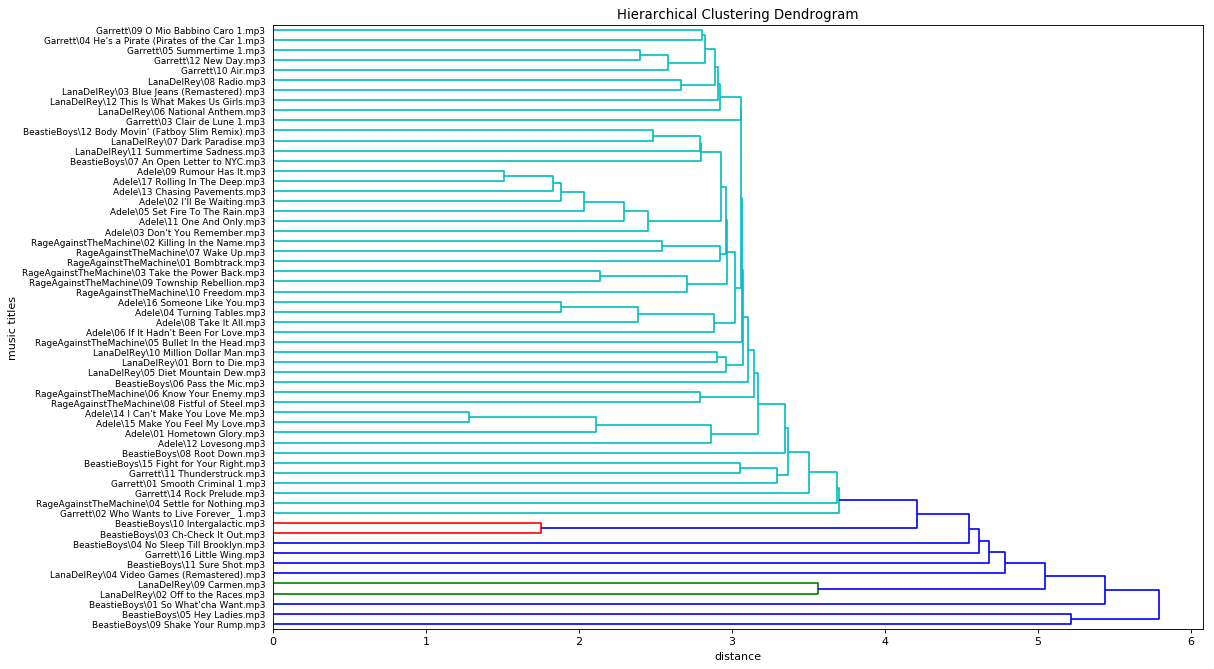

In [6]:
process = 'single'
similarity = 'correlation'
clustering(process, similarity)

##### Anmerkung
**Complete Linkage**
 
Die Complete Linkage (Maximum-Methode) bestimmt für alle Clusterpaare die jeweils am weitesten entfernt liegenden Objekte. Diejenigen Cluster werden fusioniert, für die diese Distanz minimal ist. 
Auch hier können alle Distanzmaße verwendet werden. Als Ergebnis liefert die Maximum-Methode relativ homogene Cluster gleicher Größe (dilatierendes Verhalten) und wird deshalb in der Praxis häufig verwendet.

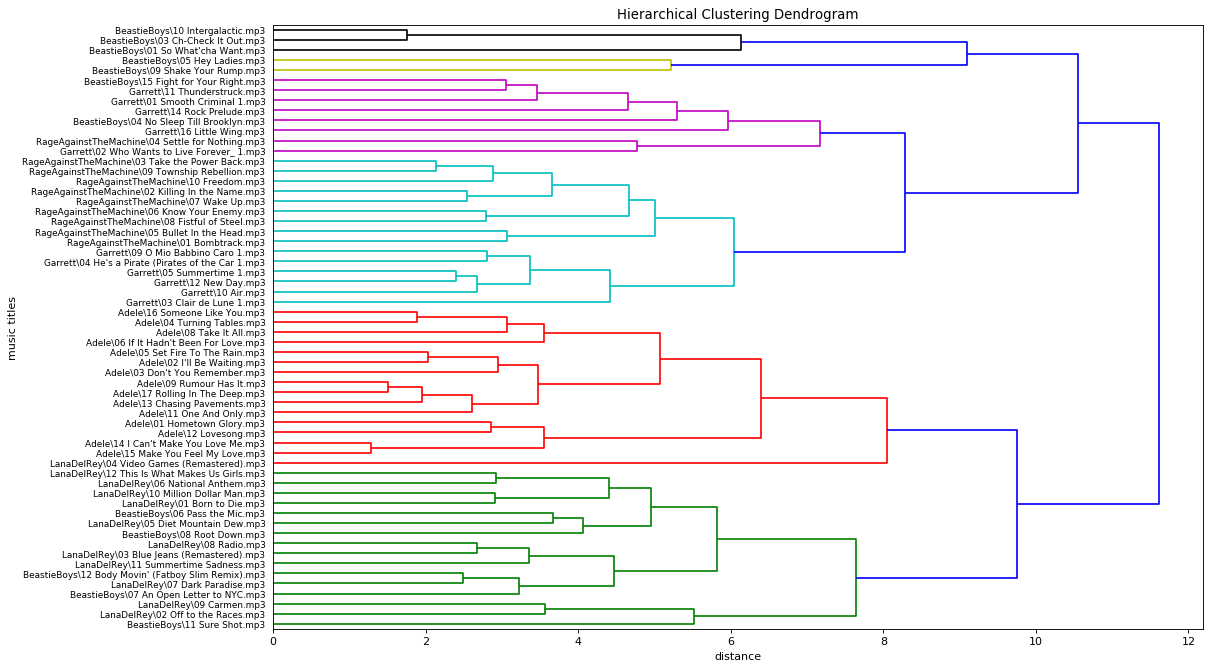

In [7]:
process = 'complete'
similarity = 'correlation'
clustering(process, similarity)

##### Anmerkung
**Average Linkage**
 
Average Linkage (Durchschnitts-Methode) berechnet für je zwei Cluster den Durchschnitt aller Objektdistanzen und fusioniert die Cluster mit der kleinsten Durchschnittsdistanz. Diese ist identisch mit der Distanz der Clusterschwerpunkte (Centroide). 
Als Distanzmaße kommen alle Maße in Frage, für die eine Durchschnittsbildung möglich ist. 
Vom Clustereffekt liegt die Methode zwischen der Minimum- und der Maximum-Methode (konservatives Verhalten).

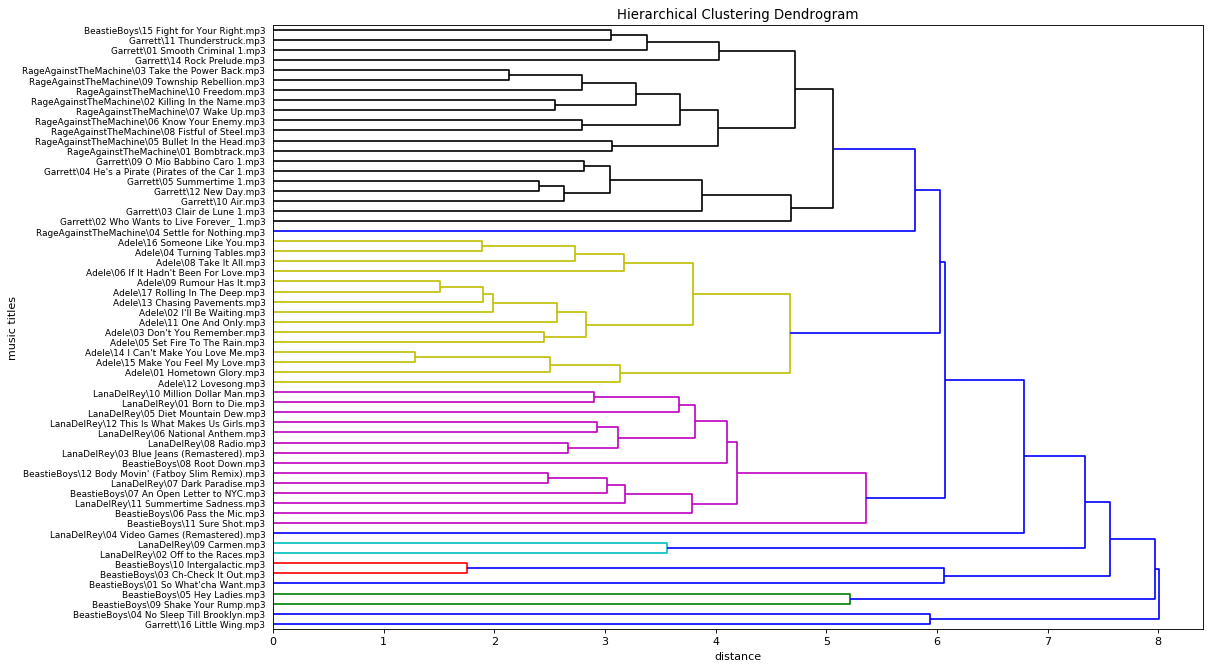

In [8]:
process = 'average'
similarity = 'correlation'
clustering(process, similarity)

##### Anmerkung
**Median-Methode**

Die Median-Methode wird insbesondere bei euklidischen Distanzen angewendet. Es werden diejenigen Cluster fusioniert, deren euklidischer Abstand minimal ist. Diese Methode vernachlässigt die Objekthäufigkeiten der zu fusionierenden Cluster. Will man diese berücksichtigen, so ist die Durchschnittsmethode geeigneter.

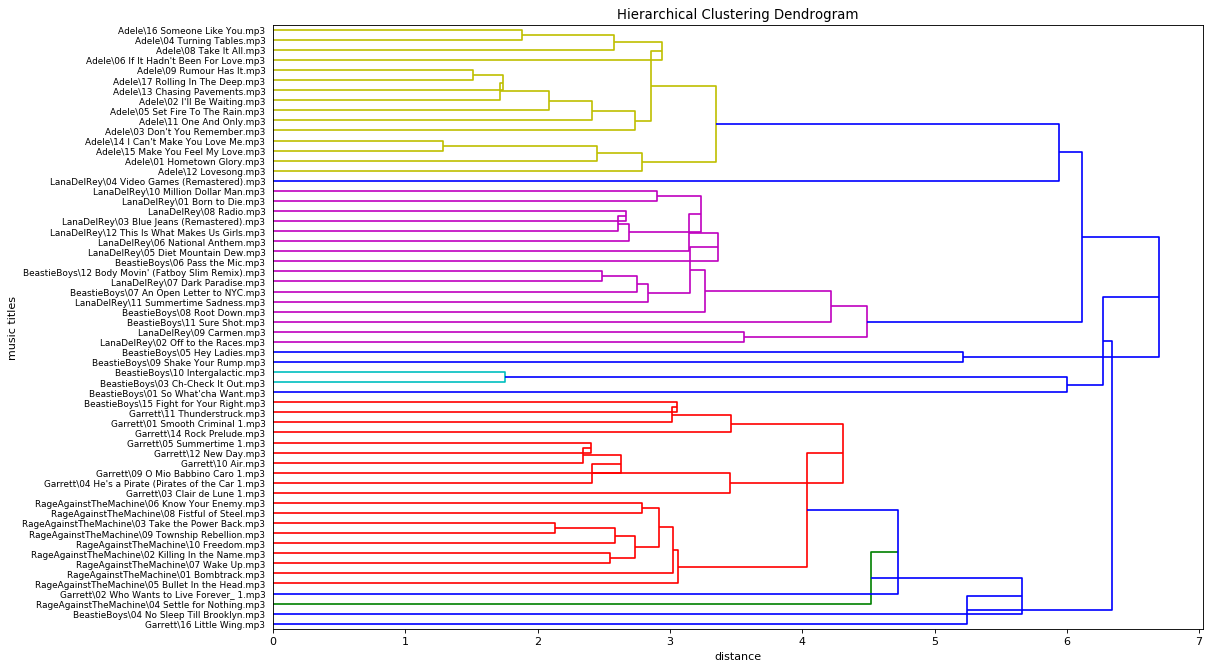

In [9]:
process = 'median'
similarity = 'euclidean'
clustering(process, similarity)

##### Anmerkung 
**Ward-Methode**
 
Die Ward-Methode (Minimum-Varianz-Methode, Fehlerquadratsummenmethode, HGROUP-Methode) fusioniert die Cluster so, dass die Erhöhung der gesamten Fehlerquadratsumme minimal ist. Die Fehlerquadratsumme wird als Summe der quadratischen Distanzen der Objekte eines Clusters vom Clustermittelwert berechnet. 

Die Ward-Methode fusioniert in den ersten Schritten bevorzugt kleine Cluster in Regionen mit hoher Objektdichte. Mit fortschreitender Clusterung neigt die Methode dazu, Unterschiede in der Objektzahl verschiedener Cluster auszugleichen. Besteht die beste Gruppierung aus Clustern unterschiedlicher Größe, so ist die Durchschnitts-Methode besser geeignet.

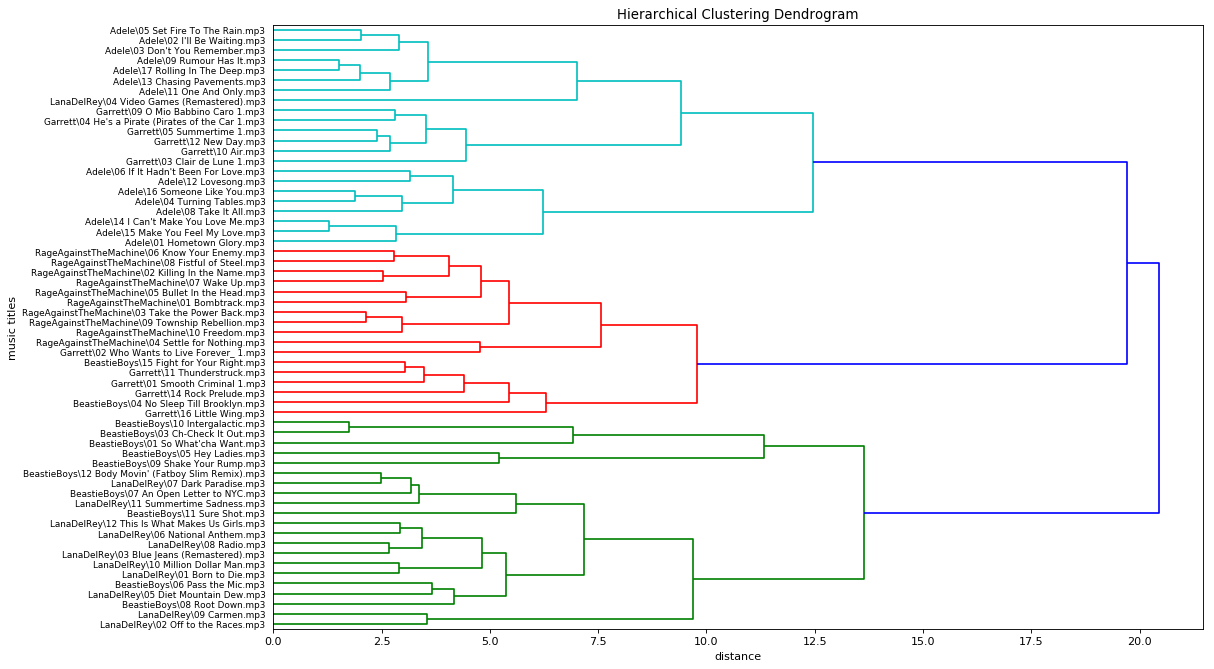

In [10]:
process = 'ward'
similarity = 'euclidean'
clustering(process, similarity)

#### Aufgabe 3
Mögliche Ansätze, um die Musikgruppierung zu verbessen, wäre das Betrachten weiterer Daten der Musikstücke auf Meta-Ebene (sofern diese vorhanden bzw. Musikstücke korrekt getaggt sind):
* Genre
* Erscheinungsjahr
* BPM (Beats Per Minute)